In [1]:
from google.colab import files
uploaded = files.upload()


Saving IAN_ISIR_DATASET.v3i.yolov12.zip to IAN_ISIR_DATASET.v3i.yolov12 (1).zip


In [2]:
import zipfile
import os

# Nama file zip sesuai hasil upload kamu
zip_file = "IAN_ISIR_DATASET.v3i.yolov12.zip"
extract_folder = "/content/dataset"

# Buat folder dan ekstrak
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Tampilkan isi folder untuk cek
os.listdir(extract_folder)


['train',
 'valid',
 'README.dataset.txt',
 'README.roboflow.txt',
 'test',
 'data.yaml']

In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
import os

# Cari file data.yaml di folder dataset
for root, dirs, files in os.walk('/content/dataset'):
    for file in files:
        if file == 'data.yaml':
            print(os.path.join(root, file))


/content/dataset/data.yaml


In [5]:
from ultralytics import YOLO

# Membuat model baru dari pretrained YOLOv8 (bisa pilih 'yolov8n.pt', 'yolov8s.pt', dll.)
model = YOLO('yolov8n.pt')  # 'n' = nano (ringan), 's' = small, 'm' = medium, dst.

# Mulai training
model.train(
    data='/content/dataset/data.yaml',
    epochs=16,           # Jumlah epoch (bisa ubah sesuai kebutuhan)
    imgsz=640,           # Resolusi gambar (default 640)
    batch=32,             # Ukuran batch (ubah kalau RAM kecil/besar)
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 43.7MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=16, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 286MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 26.6±9.7 MB/s, size: 52.9 KB)


train: Scanning /content/dataset/train/labels... 1368 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1368/1368 [00:01<00:00, 906.23it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.6±13.4 MB/s, size: 59.5 KB)


val: Scanning /content/dataset/valid/labels... 293 images, 0 backgrounds, 0 corrupt: 100%|██████████| 293/293 [00:00<00:00, 756.39it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      4.14G      1.122      2.043      1.576         66        640: 100%|██████████| 43/43 [00:24<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        293        326      0.804      0.606      0.749      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16      4.92G      1.149      1.293      1.555         55        640: 100%|██████████| 43/43 [00:21<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        293        326      0.742      0.588      0.704      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16      4.94G      1.141      1.139      1.534         62        640: 100%|██████████| 43/43 [00:20<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        293        326      0.675      0.624      0.705      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16      4.95G      1.156      1.064      1.536         70        640: 100%|██████████| 43/43 [00:19<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        293        326      0.732        0.8      0.737      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16      4.97G      1.124     0.9326      1.515         62        640: 100%|██████████| 43/43 [00:19<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        293        326      0.951      0.849      0.925      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      4.99G      1.092     0.8657      1.494         70        640: 100%|██████████| 43/43 [00:20<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        293        326       0.89      0.901      0.902      0.616


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16         5G      1.016     0.8361      1.649         26        640: 100%|██████████| 43/43 [00:22<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        293        326      0.898      0.847      0.912      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16      5.02G     0.9572      0.705      1.578         29        640: 100%|██████████| 43/43 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        293        326      0.922      0.873      0.926      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      5.04G     0.9371     0.6498       1.55         24        640: 100%|██████████| 43/43 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        293        326      0.957      0.866      0.946      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16      5.05G      0.927     0.5948      1.542         25        640: 100%|██████████| 43/43 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        293        326      0.946      0.887      0.959      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16      5.07G      0.904      0.565      1.513         26        640: 100%|██████████| 43/43 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        293        326      0.964      0.905      0.958      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16      5.09G     0.8765       0.53      1.483         24        640: 100%|██████████| 43/43 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        293        326      0.969      0.906      0.959      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      5.11G      0.845     0.5104       1.44         24        640: 100%|██████████| 43/43 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        293        326      0.943      0.904      0.953      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16      5.12G     0.8238      0.497      1.428         27        640: 100%|██████████| 43/43 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        293        326      0.967      0.908      0.965      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16      5.14G      0.815     0.4677      1.421         25        640: 100%|██████████| 43/43 [00:19<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        293        326      0.947      0.933      0.969      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16      5.16G     0.7812     0.4493        1.4         29        640: 100%|██████████| 43/43 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        293        326       0.95       0.92      0.971      0.731



16 epochs completed in 0.104 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


                   all        293        326       0.95       0.92      0.971      0.731
            DAUN_BIASA        150        171      0.981      0.918      0.977       0.81
            DAUN_GATAL        143        155      0.918      0.923      0.965      0.652
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787786bffcd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

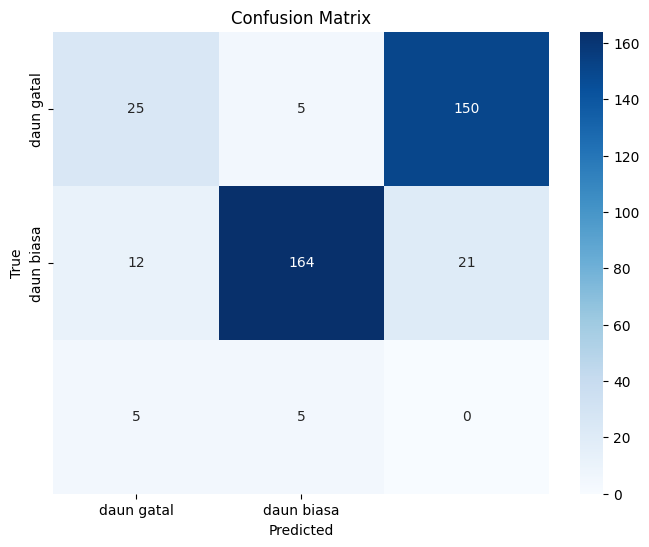

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Misalnya, cm adalah confusion matrix Anda
cm = np.array([
    [25, 5, 150],
    [12, 164, 21],
    [5, 5, 0]  # Angka 0 di sini
])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=["daun gatal", "daun biasa"], yticklabels=["daun gatal", "daun biasa"])

plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


In [7]:
import pandas as pd

# Data metrik pelatihan
data = {
    'train/box_loss': [0.5, 0.4, 0.3, 0.2, 0.15, 0.1],  # Sesuaikan dengan data asli
    'train/cls_loss': [0.2, 0.15, 0.1, 0.05, 0.03, 0.01],  # Sesuaikan dengan data asli
    'metrics/mAP50(B)': [0.7, 0.75, 0.8, 0.85, 0.9, 0.92],  # Sesuaikan dengan data asli
    'metrics/precision(B)': [0.85, 0.88, 0.9, 0.92, 0.94, 0.95],  # Sesuaikan dengan data asli
    'metrics/recall(B)': [0.8, 0.82, 0.83, 0.84, 0.85, 0.86],  # Sesuaikan dengan data asli
}

# Membuat DataFrame
df = pd.DataFrame(data)
print(df)  # Untuk memverifikasi DataFrame

   train/box_loss  train/cls_loss  metrics/mAP50(B)  metrics/precision(B)  \
0            0.50            0.20              0.70                  0.85   
1            0.40            0.15              0.75                  0.88   
2            0.30            0.10              0.80                  0.90   
3            0.20            0.05              0.85                  0.92   
4            0.15            0.03              0.90                  0.94   
5            0.10            0.01              0.92                  0.95   

   metrics/recall(B)  
0               0.80  
1               0.82  
2               0.83  
3               0.84  
4               0.85  
5               0.86  


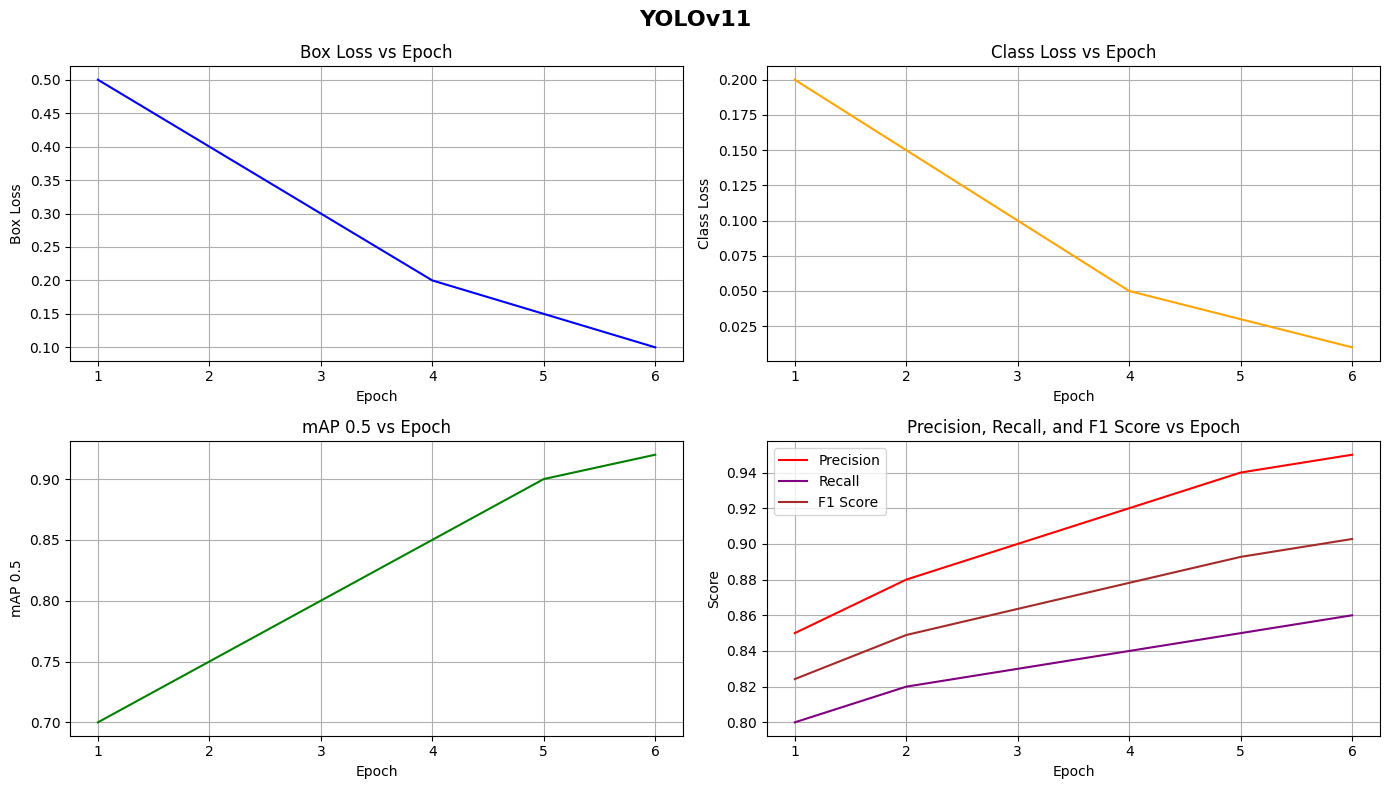

In [8]:
import matplotlib.pyplot as plt

# Menghitung F1 Score (secara manual)
f1_score = [(2 * (p * r) / (p + r)) if (p + r) > 0 else 0 for p, r in zip(df['metrics/precision(B)'], df['metrics/recall(B)'])]

# Menentukan epoch
epochs = range(1, len(df) + 1)

# Membuat plot untuk metrik pelatihan
plt.figure(figsize=(14, 8))

# Plot Box Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, df['train/box_loss'], label="Box Loss", color='blue')
plt.title("Box Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Box Loss")
plt.grid(True)

# Plot Class Loss
plt.subplot(2, 2, 2)
plt.plot(epochs, df['train/cls_loss'], label="Class Loss", color='orange')
plt.title("Class Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Class Loss")
plt.grid(True)

# Plot mAP (IoU=0.5)
plt.subplot(2, 2, 3)
plt.plot(epochs, df['metrics/mAP50(B)'], label="mAP 0.5", color='green')
plt.title("mAP 0.5 vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("mAP 0.5")
plt.grid(True)

# Plot Precision, Recall, and F1 Score
plt.subplot(2, 2, 4)
plt.plot(epochs, df['metrics/precision(B)'], label="Precision", color='red')
plt.plot(epochs, df['metrics/recall(B)'], label="Recall", color='purple')
plt.plot(epochs, f1_score, label="F1 Score", color='brown')
plt.title("Precision, Recall, and F1 Score vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Menambahkan judul utama
plt.suptitle("YOLOv11", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

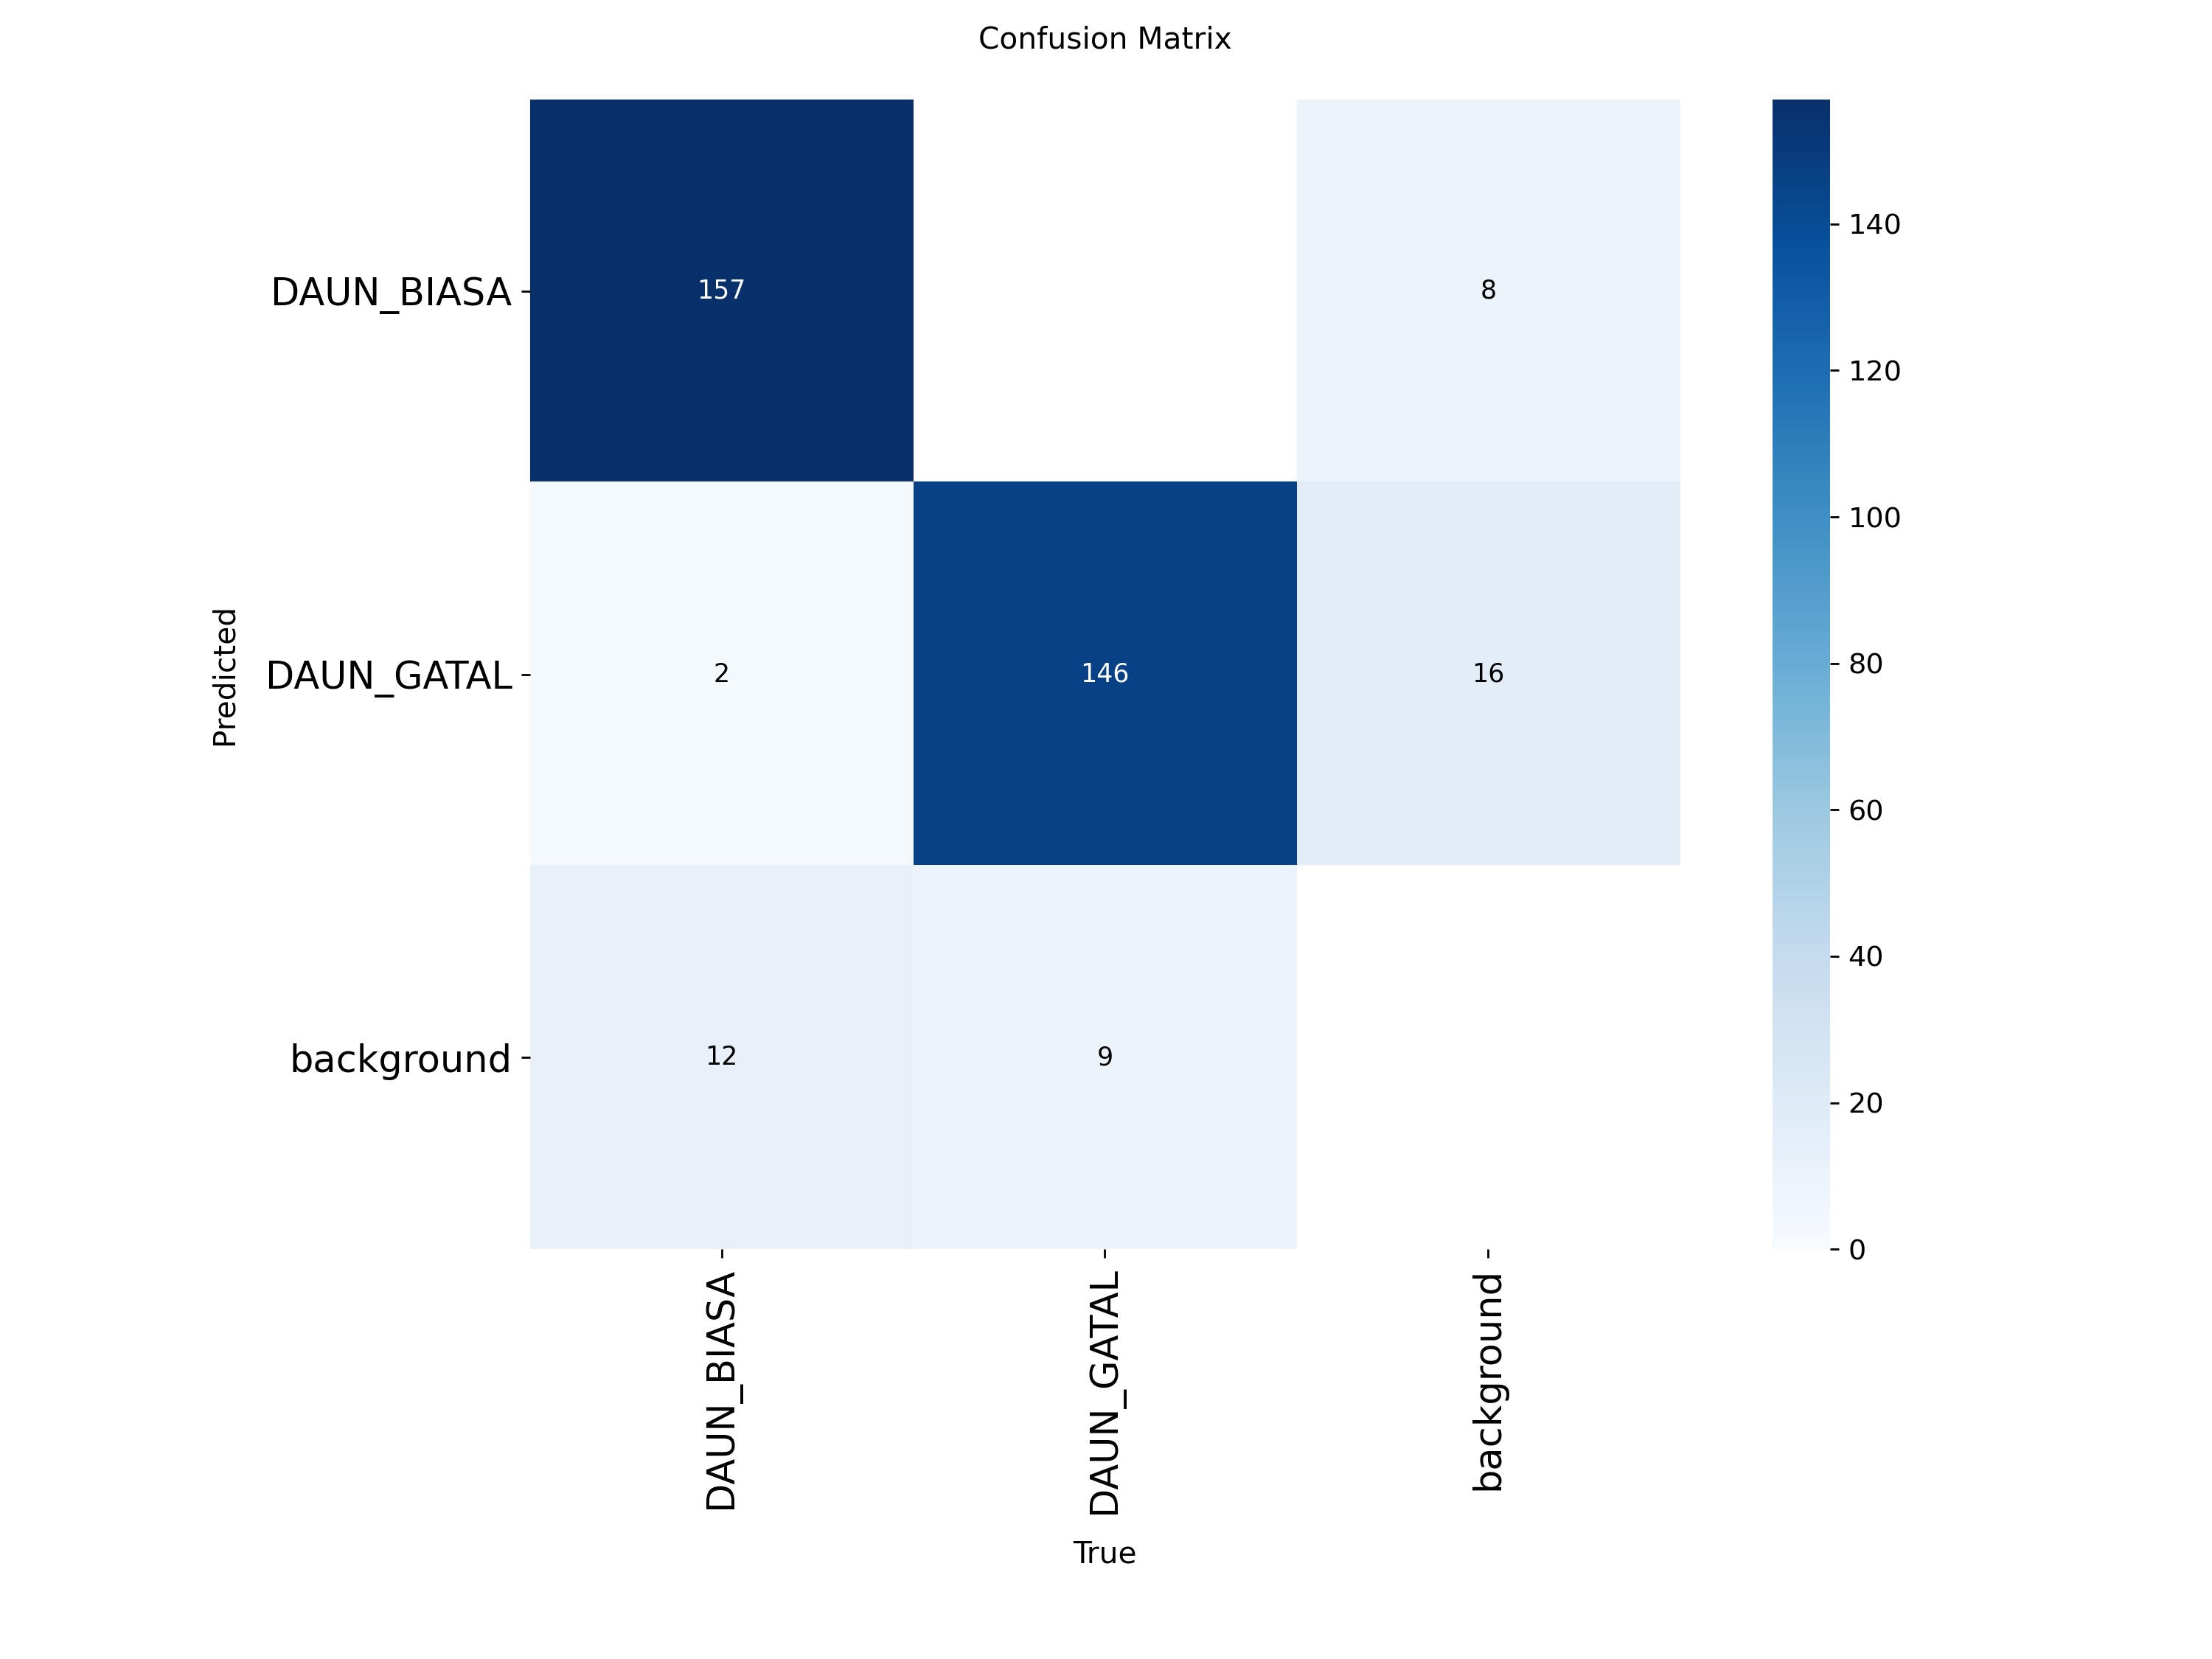

In [9]:
from IPython.display import Image, display

display(Image(filename='/content/runs/detect/train/confusion_matrix.png'))


In [11]:
from google.colab import files
from ultralytics import YOLO
import glob
import os
import time
from IPython.display import Image, display

# Muat model hasil training
model = YOLO('/content/runs/detect/train/weights/best.pt')

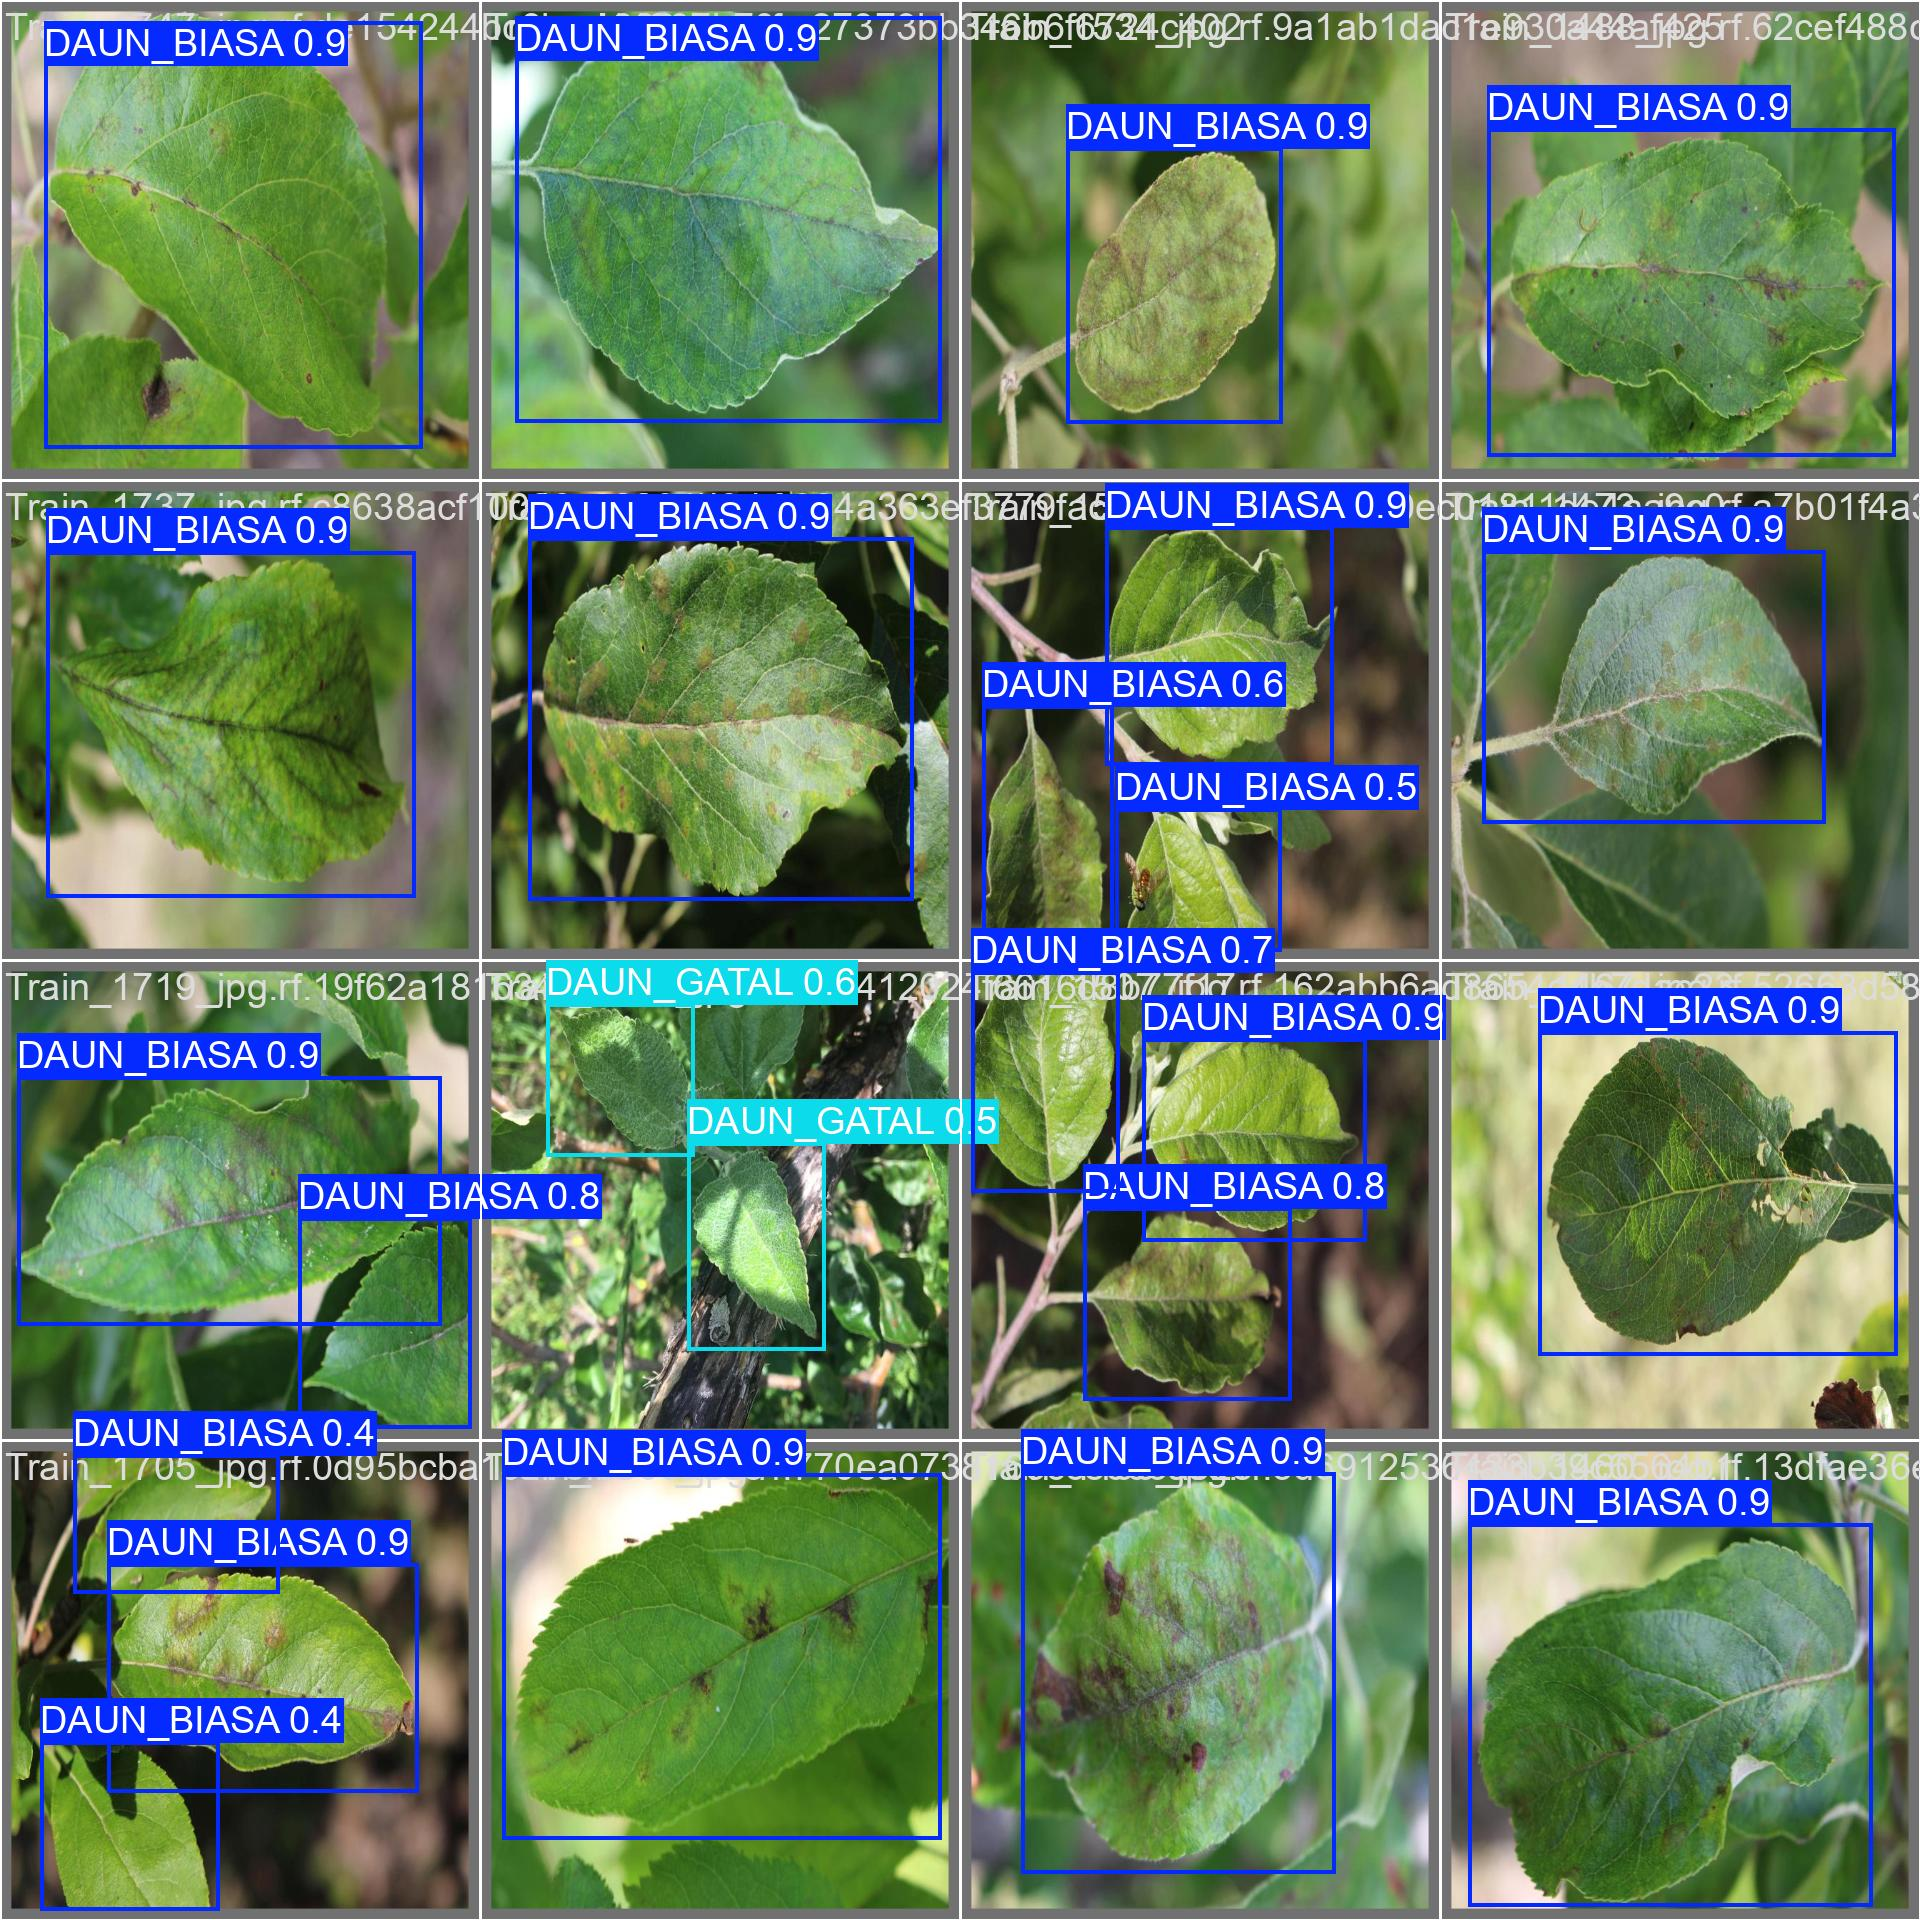

In [12]:
display(Image(filename='/content/runs/detect/train/val_batch0_pred.jpg'))


In [13]:
from ultralytics import YOLO

# Memuat model yang sudah dilatih (misalnya 'yolov8n.pt' atau model lainnya)
model = YOLO('yolov8n.pt')

# Jika Anda sudah melakukan pelatihan model, simpan model yang sudah dilatih
# Menyimpan model terlatih ke dalam format .pt
model.save('yolo.pt')  # Gantilah 'best_model.pt' dengan nama file yang Anda inginkan

In [14]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")
print(model.names)

{0: 'DAUN_BIASA', 1: 'DAUN_GATAL'}
